In [1]:
import pandas as pd
import csv
import sys
import numpy as np
import matplotlib.pyplot as plt

In [28]:
mydata=pd.read_csv('D:\Seminar Matematika\Data Historis Emas Berjangka (1).csv')
#mydata['Tanggal']=mydata['Tanggal'].astype('datetime')
mydata.info()
mydata.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tanggal     119 non-null    object
 1   Terakhir    119 non-null    object
 2   Pembukaan   119 non-null    object
 3   Tertinggi   119 non-null    object
 4   Terendah    119 non-null    object
 5   Vol.        119 non-null    object
 6   Perubahan%  119 non-null    object
dtypes: object(7)
memory usage: 6.6+ KB


,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,Okt '01,"279,50","291,80","292,90","274,00","0,96K","-4,41%"
1,Nov '01,"273,90","280,50","280,50","272,60","27,21K","-2,00%"
2,Des '01,"278,70","274,20","281,30","271,20","2,90K","1,75%"
3,Jan '02,"282,10","279,00","283,20","276,70","27,50K","1,22%"
4,Feb '02,"296,70","282,30","308,00","282,20","5,10K","5,18%"


In [34]:
#Preparing Data
data1=mydata['Tanggal']
data2=list()
for i in mydata['Terakhir']:
    if '.' in i:
        a=i.split('.')
        b=a[0]+a[1]
    else:
        b=i
    c=b.split(',')
    d=c[0]+'.'+c[1]
    d=float(d)
    data2.append(d)
data={'Tanggal' : data1,
      'Terakhir' : data2}
df=pd.DataFrame(data)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Tanggal   119 non-null    object 
 1   Terakhir  119 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.0+ KB


,Tanggal,Terakhir
0,Okt '01,279.5
1,Nov '01,273.9
2,Des '01,278.7
3,Jan '02,282.1
4,Feb '02,296.7


In [39]:
#Menentukan himpunan semesta pembicaraan (U)
U=[round(min(df['Terakhir'])),round(max(df['Terakhir']))]
D1=2
D2=2 #Suka - suka wkwk
U=[U[0]-D1,U[1]+D2]
print(U)

[272, 1830]


In [40]:
#Menentukan panjang interval (R)
R=U[1]-U[0]
R=round(R,2) #pembulatan
print(R)

1558


In [41]:
#Menentukan banyaknya interval kelas
import math
n=len(df['Terakhir'])
K=1+3.3*math.log10(n)
K=round(K) #ini ga tau penting atau engga
print(K)

8


In [42]:
#Menentukan lebar interval
L=R/K
print(L)

194.75


In [43]:
#Mendefinisikan himpunan fuzzy dan menentukan nilai tengah
I=list()
Interval=list()
m=list()
a=U[0]
for i in range(K):
    I.append('A'+str(i+1))
    Interval.append((a,round(a+L,3)))
    m.append((a+round(a+L,3))/2)
    a=round(a+L,3)
data_tabel={'Himpunan Fuzzy' : I,
              'Interval' : Interval,
              'Nilai Tengah' : m}
df1=pd.DataFrame(data_tabel)
df1.head(10)

,Himpunan Fuzzy,Interval,Nilai Tengah
0,A1,"(272, 466.75)",369.375
1,A2,"(466.75, 661.5)",564.125
2,A3,"(661.5, 856.25)",758.875
3,A4,"(856.25, 1051.0)",953.625
4,A5,"(1051.0, 1245.75)",1148.375
5,A6,"(1245.75, 1440.5)",1343.125
6,A7,"(1440.5, 1635.25)",1537.875
7,A8,"(1635.25, 1830.0)",1732.625


In [44]:
#Membuat tabel Fuzzy Logical Relationship (FLR)
fuzzyfikasi=list()
relasi=list()
r=0
for i in range(n):
    for j in range(K):
        if df['Terakhir'][i]>=df1['Interval'][j][0] and df['Terakhir'][i]<=df1['Interval'][j][1]:
            fuzzyfikasi.append(df1['Himpunan Fuzzy'][j])
            if r==0:
                relasi.append('-')
            else:
                relasi.append(r+'->'+df1['Himpunan Fuzzy'][j])
            r=df1['Himpunan Fuzzy'][j]
            break
        else:
            continue
data_aktual={'Tanggal' : data1,
             'Emas' : data2,
             'Fuzzyfikasi' : fuzzyfikasi,
             'Relasi' : relasi}
df2=pd.DataFrame(data_aktual)
df2.head(8)

,Tanggal,Emas,Fuzzyfikasi,Relasi
0,Okt '01,279.5,A1,-
1,Nov '01,273.9,A1,A1->A1
2,Des '01,278.7,A1,A1->A1
3,Jan '02,282.1,A1,A1->A1
4,Feb '02,296.7,A1,A1->A1
5,Mar '02,302.6,A1,A1->A1
6,Apr '02,308.9,A1,A1->A1
7,Mei '02,326.5,A1,A1->A1


In [45]:
df2.tail(8)

,Tanggal,Emas,Fuzzyfikasi,Relasi
111,Jan '11,1333.8,A6,A6->A6
112,Feb '11,1409.3,A6,A6->A6
113,Mar '11,1438.9,A6,A6->A6
114,Apr '11,1556.0,A7,A6->A7
115,Mei '11,1535.9,A7,A7->A7
116,Jun '11,1502.3,A7,A7->A7
117,Jul '11,1628.3,A7,A7->A7
118,Ags '11,1828.5,A8,A7->A8


In [46]:
#Membuat Fuzzy Logic Relationship Group
grup=list()
FLR=list()
for i in range(len(I)):
    grup.append('Grup '+str(i+1))
    FLR1=list()
    for j in range(1,n):
        if relasi[j][1:3]==str(i+1):
            FLR1.append(fuzzyfikasi[j])
        elif relasi[j][1:3]==str(i+1)+'-':
            FLR1.append(fuzzyfikasi[j])
        else:
            pass
    FLR2='A'+str(i+1)+'->'
    for ii in range(len(FLR1)):
        FLR2+=FLR1[ii]+','
    FLR2=FLR2[:-1]
    FLR.append(FLR2)
        
data_FLRG={'Grup' : grup,
           'Himpunan Fuzzy' : I,
           'FLR' : FLR}
df3=pd.DataFrame(data_FLRG)
df3.head(10)

,Grup,Himpunan Fuzzy,FLR
0,Grup 1,A1,"A1->A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,..."
1,Grup 2,A2,"A2->A1,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2,..."
2,Grup 3,A3,"A3->A3,A3,A2,A3,A3,A3,A3,A3,A4,A4,A3,A4"
3,Grup 4,A4,"A4->A4,A4,A4,A4,A4,A4,A3,A3,A4,A4,A4,A4,A4,A4,..."
4,Grup 5,A5,"A5->A5,A5,A5,A5,A5,A5,A5,A5,A6"
5,Grup 6,A6,"A6->A6,A6,A6,A6,A6,A6,A6,A7"
6,Grup 7,A7,"A7->A7,A7,A7,A8"
7,Grup 8,A8,A8-


In [47]:
#FLRG Pengulangan
#Catatan : Untuk run code ini, sebaiknya run yang sebelumnya terlebih dahulu agar terhindar dari error
for i in range(len(df3)):
    bb=df3['FLR'][i]
    if i>=0 and i<=8:
        bb=bb[4:]
    elif i>=9:
        bb=bb[5:]
    bb=bb.split(',')
    cc=list()
    for ii in range(len(bb)):
        if bb[ii] in cc:
            pass
        else:
            cc.append(bb[ii])
    dd=list()
    for j in range(len(cc)):
        k=0
        for jj in range(len(bb)):
            if cc[j]==bb[jj]:
                k+=1
            else:
                pass
        dd.append(str(k)+'('+cc[j]+')')
    df3['FLR'][i]=dd
df3.head(10)

,Grup,Himpunan Fuzzy,FLR
0,Grup 1,A1,"[46(A1), 2(A2)]"
1,Grup 2,A2,"[1(A1), 15(A2), 2(A3)]"
2,Grup 3,A3,"[8(A3), 1(A2), 3(A4)]"
3,Grup 4,A4,"[16(A4), 2(A3), 1(A5)]"
4,Grup 5,A5,"[8(A5), 1(A6)]"
5,Grup 6,A6,"[7(A6), 1(A7)]"
6,Grup 7,A7,"[3(A7), 1(A8)]"
7,Grup 8,A8,[1()]


In [48]:
#Pembuatan DataFrame Pembobotan Fuzzy
A=list()
o=list()
for i in range(len(df3)):
    A.append('A'+str(i+1))
    o.append(0)
df4={'X(t-1)' : A}
for i in range(len(df3)):
    df4[A[i]]=o
df4=pd.DataFrame(df4)
df4.head(K)        

,X(t-1),A1,A2,A3,A4,A5,A6,A7,A8
0,A1,0,0,0,0,0,0,0,0
1,A2,0,0,0,0,0,0,0,0
2,A3,0,0,0,0,0,0,0,0
3,A4,0,0,0,0,0,0,0,0
4,A5,0,0,0,0,0,0,0,0
5,A6,0,0,0,0,0,0,0,0
6,A7,0,0,0,0,0,0,0,0
7,A8,0,0,0,0,0,0,0,0


In [50]:
#Input Bobot Ke Dalam Matriks Pembobobotan Fuzzy
for i in range(len(df3)):
    x=df3['FLR'][i]
    for j in range(len(x)):
        y=x[j].split('(')
        y2=y[1]
        if y2==')':
            pass
        else:
            df4[y2[:-1]][i]=int(y[0])
for i in range(len(df4)):
    df4[A[i]]=df4[A[i]].astype(float)
df4.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,X(t-1),A1,A2,A3,A4,A5,A6,A7,A8
0,A1,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1,A2,1.0,15.0,2.0,0.0,0.0,0.0,0.0,0.0
2,A3,0.0,1.0,8.0,3.0,0.0,0.0,0.0,0.0
3,A4,0.0,0.0,2.0,16.0,1.0,0.0,0.0,0.0
4,A5,0.0,0.0,0.0,0.0,8.0,1.0,0.0,0.0
5,A6,0.0,0.0,0.0,0.0,0.0,7.0,1.0,0.0
6,A7,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0
7,A8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
#Pembobotan Normalisasi
Bobot_Norm=df4.drop(['X(t-1)'],axis=1)
Bobot_Norm=Bobot_Norm.values
for i in range(len(Bobot_Norm)):
    jum=sum(Bobot_Norm[i])
    for j in range(len(Bobot_Norm)):
        ele=float(Bobot_Norm[i][j])
        Bobot_Norm[i][j]=ele/jum
print(Bobot_Norm)

[[0.95833333 0.04166667 0.         0.         0.         0.
  0.         0.        ]
 [0.05555556 0.83333333 0.11111111 0.         0.         0.
  0.         0.        ]
 [0.         0.08333333 0.66666667 0.25       0.         0.
  0.         0.        ]
 [0.         0.         0.10526316 0.84210526 0.05263158 0.
  0.         0.        ]
 [0.         0.         0.         0.         0.88888889 0.11111111
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.875
  0.125      0.        ]
 [0.         0.         0.         0.         0.         0.
  0.75       0.25      ]
 [       nan        nan        nan        nan        nan        nan
         nan        nan]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


In [58]:
#Perbaikan nan
B_T=np.nan_to_num(Bobot_Norm, nan=0)
print(B_T)

[[0.95833333 0.04166667 0.         0.         0.         0.
  0.         0.        ]
 [0.05555556 0.83333333 0.11111111 0.         0.         0.
  0.         0.        ]
 [0.         0.08333333 0.66666667 0.25       0.         0.
  0.         0.        ]
 [0.         0.         0.10526316 0.84210526 0.05263158 0.
  0.         0.        ]
 [0.         0.         0.         0.         0.88888889 0.11111111
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.875
  0.125      0.        ]
 [0.         0.         0.         0.         0.         0.
  0.75       0.25      ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]]


In [59]:
#Perkalian Elemen Bobot Normalisasi dengan Median (m1 X Bobot A1)
M=list()
for i in range(len(B_T)):
    Mn=list()
    for j in range(len(B_T)):
        Mnn=B_T[i][j]*df1['Nilai Tengah'][j]
        Mn.append(Mnn)
    M.append(Mn)
print(M)

[[353.984375, 23.505208333333332, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [20.520833333333332, 470.1041666666667, 84.31944444444444, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 47.010416666666664, 505.91666666666663, 238.40625, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 79.88157894736841, 803.0526315789473, 60.440789473684205, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1020.7777777777777, 149.23611111111111, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1175.234375, 192.234375, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1153.40625, 433.15625], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]


In [60]:
#Pembuatan Data Frame Peramalan
t=list()
for i in range(len(df)):
    t.append(i+1)
df6={'t' : t,
     'Tanggal' : df['Tanggal'],
     'Data' : df['Terakhir']}
Ft=list()
Ft.append(0)
for i in range(1,len(df)):
    Wn=df2['Fuzzyfikasi'][i-1]
    Wn=int(Wn[1:])
    jum_norm=sum(M[Wn-1])
    Ft.append(jum_norm)
df6['Peramalan F(t)']=Ft
df6=pd.DataFrame(df6)
df6.info()
df6.head(8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   t               119 non-null    int64  
 1   Tanggal         119 non-null    object 
 2   Data            119 non-null    float64
 3   Peramalan F(t)  119 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.8+ KB


,t,Tanggal,Data,Peramalan F(t)
0,1,Okt '01,279.5,0.000000
1,2,Nov '01,273.9,377.489583
2,3,Des '01,278.7,377.489583
3,4,Jan '02,282.1,377.489583
4,5,Feb '02,296.7,377.489583
5,6,Mar '02,302.6,377.489583
6,7,Apr '02,308.9,377.489583
7,8,Mei '02,326.5,377.489583


In [61]:
df6.tail(8)

,t,Tanggal,Data,Peramalan F(t)
111,112,Jan '11,1333.8,1367.46875
112,113,Feb '11,1409.3,1367.46875
113,114,Mar '11,1438.9,1367.46875
114,115,Apr '11,1556.0,1367.46875
115,116,Mei '11,1535.9,1586.56250
116,117,Jun '11,1502.3,1586.56250
117,118,Jul '11,1628.3,1586.56250
118,119,Ags '11,1828.5,1586.56250


In [62]:
#Menghitung Nilai Error (|e|)
df7={'t' : df6['t'],
     'Tanggal' : df6['Tanggal'],
     'Data' : df6['Data'],
     'Peramalan F(t)' : df6['Peramalan F(t)']}
e=list()
e.append(0)
for i in range(1,len(df6)):
    ee=df6['Data'][i]-df6['Peramalan F(t)'][i]
    ee=math.sqrt(ee**2)
    e.append(ee)
df7['Error']=e
df7=pd.DataFrame(df7)
df7.info()
df7.head(8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   t               119 non-null    int64  
 1   Tanggal         119 non-null    object 
 2   Data            119 non-null    float64
 3   Peramalan F(t)  119 non-null    float64
 4   Error           119 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 4.8+ KB


,t,Tanggal,Data,Peramalan F(t),Error
0,1,Okt '01,279.5,0.000000,0.000000
1,2,Nov '01,273.9,377.489583,103.589583
2,3,Des '01,278.7,377.489583,98.789583
3,4,Jan '02,282.1,377.489583,95.389583
4,5,Feb '02,296.7,377.489583,80.789583
5,6,Mar '02,302.6,377.489583,74.889583
6,7,Apr '02,308.9,377.489583,68.589583
7,8,Mei '02,326.5,377.489583,50.989583


In [63]:
df7.tail(8)

,t,Tanggal,Data,Peramalan F(t),Error
111,112,Jan '11,1333.8,1367.46875,33.66875
112,113,Feb '11,1409.3,1367.46875,41.83125
113,114,Mar '11,1438.9,1367.46875,71.43125
114,115,Apr '11,1556.0,1367.46875,188.53125
115,116,Mei '11,1535.9,1586.56250,50.66250
116,117,Jun '11,1502.3,1586.56250,84.26250
117,118,Jul '11,1628.3,1586.56250,41.73750
118,119,Ags '11,1828.5,1586.56250,241.93750


In [64]:
#Menentukan MAE atau MSE
N=len(e)
MAE=sum(e)/N
e_kuadrat=list()
for i in range(N):
    e_kuadrat.append(e[i]**2)
MSE=sum(e_kuadrat)/N
RMSE=math.sqrt(MSE)
print('Nilai MAE adalah ', MAE)
print('Nilai MSE adalah ', MSE)
print('Nilai RMSE adalah ', RMSE)

Nilai MAE adalah  56.502696078431356
Nilai MSE adalah  5206.126560749297
Nilai RMSE adalah  72.15349305992952


<function matplotlib.pyplot.show(*args, **kw)>

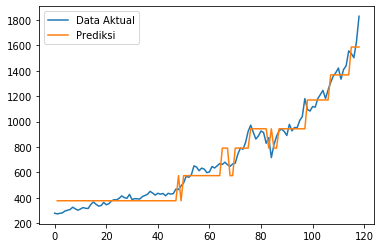

In [66]:
plt.plot(df7['Data'], label="Data Aktual")
plt.plot(df7['Peramalan F(t)'][1:], label="Prediksi")
plt.legend(loc='upper left')
plt.show